In [14]:
import numpy as np
import math
from pylab import *
import sympy as sym
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [36]:
z_str = '5 * a[0] ** 2 + a[1] ** 2 -  a[0] * a[1] - 10* a[0]'

exec('z = lambda a: ' + z_str) # dynamic execution
z_str = z_str.replace('a[0]', 'x')
z_str = z_str.replace('a[1]', 'y')
z_str

'5 * x ** 2 + y ** 2 -  x * y - 10* x'

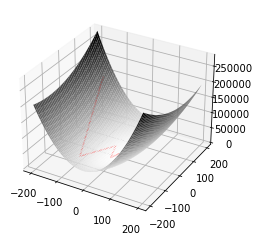

In [39]:
def z_grad(a):
    x = sym.Symbol('x')
    y = sym.Symbol('y')
    
    z_d = eval(z_str) #exec ('z_d =  ' + z_str)

    yprime = z_d.diff(y)
    dif_y=str(yprime).replace('y', str(a[1]))
    dif_y=dif_y.replace('x', str(a[0]))

    yprime = z_d.diff(x)
    dif_x=str(yprime).replace('y', str(a[1]))
    dif_x=dif_x.replace('x', str(a[0]))

    return np.array([eval(dif_y), eval(dif_x)])

def mininize(a):
    l_min = minimize_scalar(lambda l: z(a - l * z_grad(a))).x
    return a - l_min * z_grad(a)

def norm(a):
    return math.sqrt(a[0] ** 2 + a[1] ** 2)

def grad_step(dot):
    return mininize(dot)

dot = [np.array([-150.0, 150.0])]
dot.append(grad_step(dot[0]))

eps = 0.0001

while norm(dot[-2] - dot[-1]) > eps: dot.append(grad_step(dot[-1]))
def makeData ():
    x = np.arange (-200, 200, 1.0)
    y = np.arange (-200, 200, 1.0)
    xgrid, ygrid = np.meshgrid(x, y)
    zgrid = z([xgrid, ygrid])
    return xgrid, ygrid, zgrid

xt, yt, zt = makeData()

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xt, yt, zt, cmap=cm.binary)
ax.plot([x[0] for x in dot], [x[1] for x in dot], [z(x) for x in dot], color='r')

plt.show()